In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

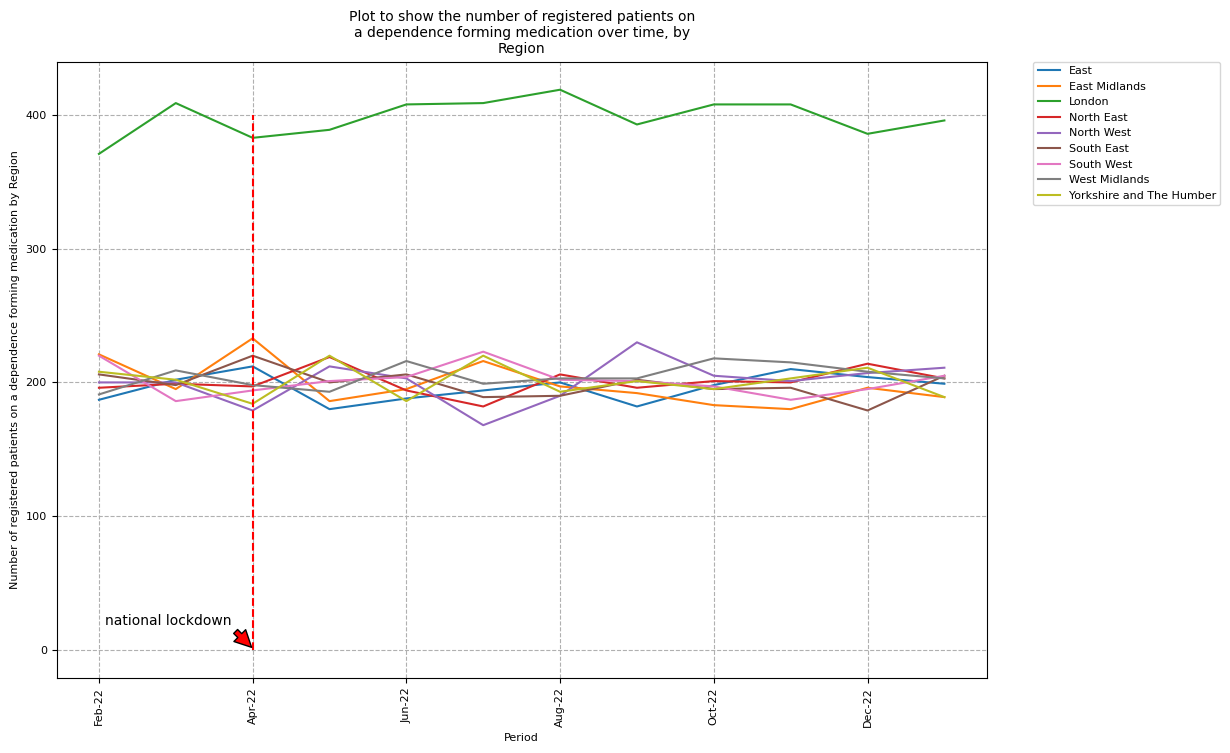

In [2]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
#data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "Unknown", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     187              221       371           196           200           206           220              191                         208
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     199              189       396           203           211           205           205              203                         189


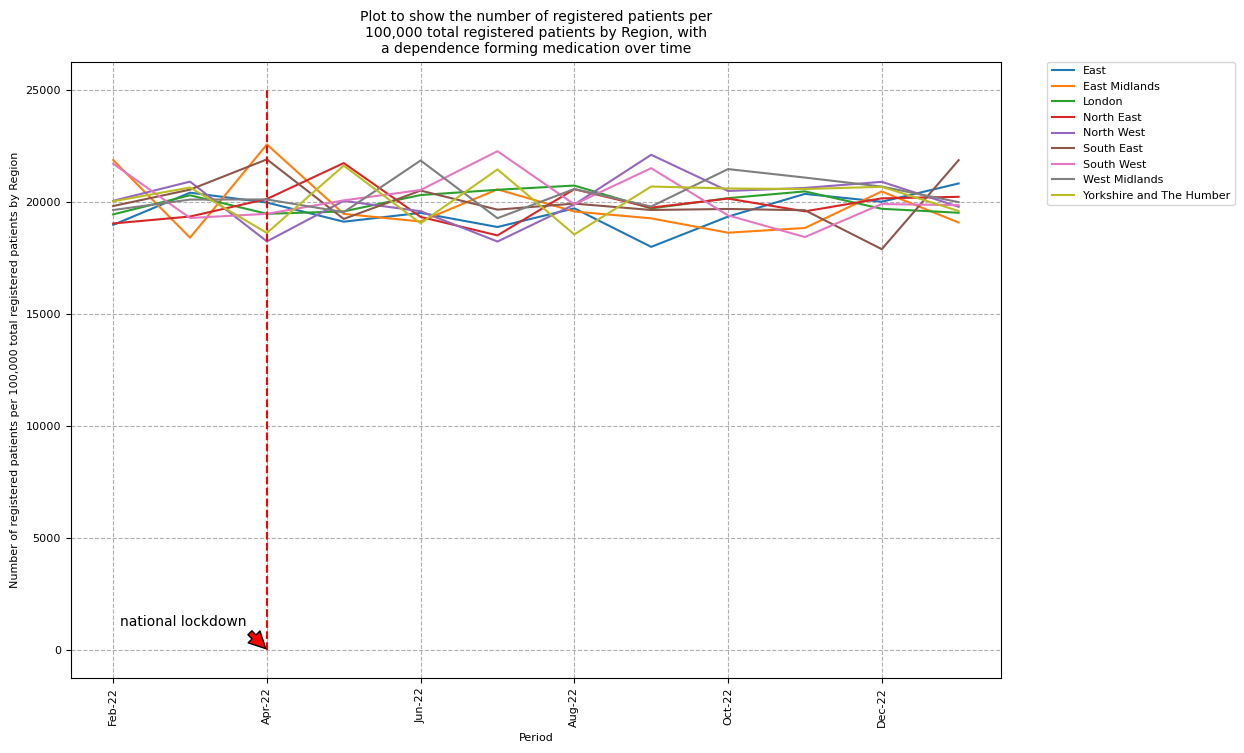

In [4]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()
